#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Gender x Continent

In [6]:
df_gender_country = df[['M/F', 'Continent']]
df_male_country = df_gender_country[df_gender_country['M/F'] == 'M']
df_female_country = df_gender_country[df_gender_country['M/F'] == 'F']

In [7]:
# males
male_continent_count = df_male_country['Continent'].value_counts()
male_continent_percent = round(df_male_country['Continent'].value_counts(normalize=True) * 100, 2)
# results df
df_male_continent_dist = pd.concat([male_continent_count, male_continent_percent], axis=1)

# females
female_continent_count = df_female_country['Continent'].value_counts()
female_continent_percent = round(df_female_country['Continent'].value_counts(normalize=True) * 100, 2)
# results df
df_female_continent_dist = pd.concat([female_continent_count, female_continent_percent], axis=1)

print('male')
print(df_male_continent_dist)
print('\nfemale')
print(df_female_continent_dist)

male
               count  proportion
Continent                       
North America  37577       86.42
Europe          3425        7.88
Asia            1332        3.06
South America    713        1.64
Oceania          345        0.79
Africa            90        0.21

female
               count  proportion
Continent                       
North America  34124       94.38
Europe          1074        2.97
Asia             440        1.22
South America    258        0.71
Oceania          209        0.58
Africa            51        0.14


### visualization

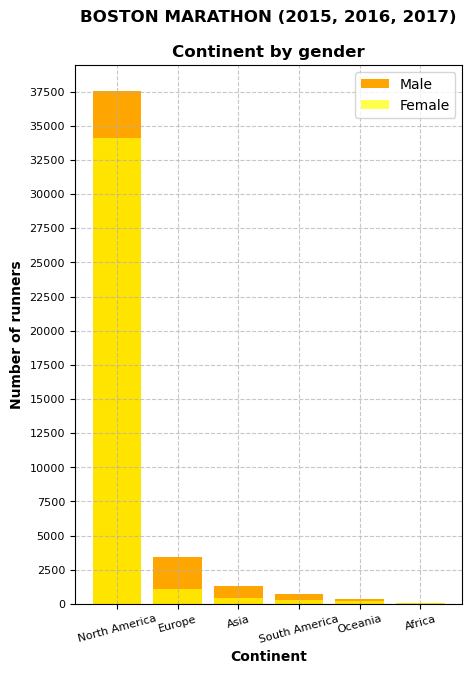

In [9]:
x_m = df_male_continent_dist
x_fm = df_female_continent_dist

plt.figure(figsize=(5,7))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=15, fontsize= 8)
plt.yticks(np.arange(0,37501,2500), fontsize=8)


plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by gender', fontweight='bold')

plt.savefig("../vexport/genderxcontinent.png", dpi=300, bbox_inches='tight')
plt.show()

### visualization without North America

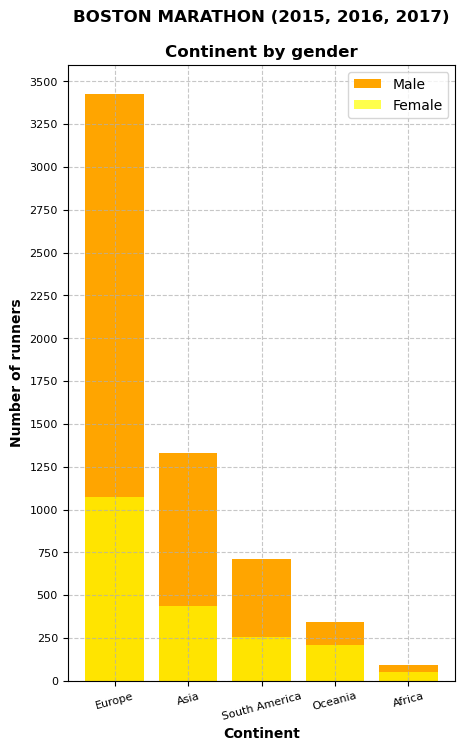

In [11]:
x_m = df_male_continent_dist
x_fm = df_female_continent_dist
x_m = x_m.drop(['North America'])
x_fm = x_fm.drop(['North America'])

plt.figure(figsize=(5,8))

ax_m = plt.bar(x_m.index, x_m['count'], color='orange', label='Male')
ax_fm = plt.bar(x_fm.index, x_fm['count'], alpha=0.7, color='yellow', label='Female')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=15, fontsize= 8)
plt.yticks(np.arange(0,3501,250), fontsize=8)


plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by gender', fontweight='bold')

plt.savefig("../vexport/genderxcontinent_noNA.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [13]:
df_male_continent_dist.to_csv('../export/genderxcontinent_male.csv')
df_female_continent_dist.to_csv('../export/genderxcontinent_female.csv')